In [1]:
import polars as pl
import matplotlib as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from libpysal import weights, examples, cg
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [2]:
b=pl.read_excel(r'C:\Users\ACER\Downloads\Put.xlsx')
gut=pl.read_excel(r"C:\Users\ACER\Downloads\Gut.xlsx")

In [3]:
x=b.get_column('x')
x=x.to_list()
y=b.get_column('y')
y=y.to_list()
p=b.get_column('row_nr')
p=p.to_list()
r=b.get_column('spect')
r=r.to_list()
t=b.get_column('proper')
t=t.to_list()
z=b.get_column('z')
z=z.to_list()


In [4]:
def nodelist(x,y,p,r,t):
    h=0
    m=[]
    while h<4111:
        o={}
        s=((x[h]),(y[h]))
        o['coord']=s
        o['spect']=r[h]
        o['proper']=t[h]
        p=(h,o)
        m.append(p)
        h+=1
    print(m)
    return m

f=nodelist(x,y,p,r,t)

[(0, {'coord': (5e-06, 0.0), 'spect': 'G', 'proper': 'Sol'}), (1, {'coord': (10.374188, 0.030419), 'spect': 'K', 'proper': None}), (2, {'coord': (5.67201, 0.053101), 'spect': 'M', 'proper': None}), (3, {'coord': (10.834733, 0.102555), 'spect': 'G', 'proper': None}), (4, {'coord': (29.10489, 0.421232), 'spect': 'M', 'proper': None}), (5, {'coord': (23.934179, 0.487833), 'spect': None, 'proper': None}), (6, {'coord': (24.239722, 0.522425), 'spect': 'G', 'proper': None}), (7, {'coord': (7.843761, 0.177365), 'spect': 'M', 'proper': None}), (8, {'coord': (5.993342, 0.138488), 'spect': 'K', 'proper': None}), (9, {'coord': (3.448844, 0.081384), 'spect': 'M', 'proper': None}), (10, {'coord': (7.878784, 0.195428), 'spect': 'K', 'proper': None}), (11, {'coord': (11.23803, 0.307211), 'spect': 'G', 'proper': None}), (12, {'coord': (16.837769, 0.46441), 'spect': 'G', 'proper': None}), (13, {'coord': (6.835774, 0.188543), 'spect': 'M', 'proper': None}), (14, {'coord': (11.948982, 0.344882), 'spect':

In [5]:
G=nx.Graph()
G.add_nodes_from(f)
print(G.edges)

[]


In [6]:
netwo={}
for iop in range(4111):
    if (G.nodes[iop]['proper'])==None:
        pass
    else:
        netwo[iop]=(G.nodes[iop]['proper'])

print(netwo)

{0: 'Sol', 16: 'Alpheratz', 20: 'Caph', 62: 'Ankaa', 85: 'Diphda', 93: '96 G. Psc', 97: "Van Maanen's Star", 169: 'Ruchbah', 218: 'Sheratan', 233: 'Hamal', 283: '268 G. Cet', 341: 'Algol', 372: '82 G. Eri', 482: 'Aldebaran', 544: 'Cursa', 548: "Kapteyn's Star", 557: 'Capella', 627: 'Menkalinan', 701: 'Sirius', 777: "Luyten's Star", 799: 'Castor', 807: 'Procyon', 818: 'Pollux', 1030: 'Regulus', 1101: 'Merak', 1104: 'Lalande 21185', 1127: 'Zosma', 1198: 'Denebola', 1203: 'Groombridge 1830', 1206: 'Phad', 1240: 'Megrez', 1265: 'Algorab', 1270: 'Gacrux', 1290: 'Porrima', 1311: 'Alioth', 1369: 'Mizar', 1371: 'Alcor', 1431: 'Mufrid', 1444: 'Menkent', 1456: 'Arcturus', 1479: 'Proxima Centauri', 1495: 'Rigil Kentaurus', 1520: 'Zubenelgenubi', 1600: 'Alphekka', 1614: 'Unukalhai', 1823: 'Rasalhague', 1846: 'Cebalrai', 1868: "Barnard's Star", 1877: 'Nash', 1911: 'Kaus Borealis', 1923: 'Vega', 2044: 'Altair', 2050: 'Alshain', 2146: 'Gienah', 2191: 'Lacaille 8760', 2194: 'Alderamin', 2320: 'Kruger 

In [7]:
def helpme(G):
    i=0
    o=[]
    while i<4111:
        S=list(G.nodes[i]['coord'])
        o.append(S)
        i+=1
    print(o)
    return o

def helpmi(G):
    i=0
    o={}
    while i<4111:
        o[i]=(G.nodes[i]['coord'])
        i+=1
    m=o
    print(m)
    return m

d=helpme(G)
d=np.array(d)
s=helpmi(G)
g=cg.KDTree(d)
wnn2=weights.KNN(g,k=6,p=2)


[[5e-06, 0.0], [10.374188, 0.030419], [5.67201, 0.053101], [10.834733, 0.102555], [29.10489, 0.421232], [23.934179, 0.487833], [24.239722, 0.522425], [7.843761, 0.177365], [5.993342, 0.138488], [3.448844, 0.081384], [7.878784, 0.195428], [11.23803, 0.307211], [16.837769, 0.46441], [6.835774, 0.188543], [11.948982, 0.344882], [26.511674, 0.957394], [25.974572, 0.951042], [20.736513, 0.765325], [12.087555, 0.472486], [20.852074, 0.825903], [8.600014, 0.344589], [25.383037, 1.227767], [18.046958, 0.887717], [14.7174, 0.729614], [17.377471, 0.890451], [23.43762, 1.235191], [25.919321, 1.421723], [10.708246, 0.600442], [7.061621, 0.40914], [22.521034, 1.326619], [3.171508, 0.18905], [4.779241, 0.32306], [15.131259, 1.060284], [3.075498, 0.217909], [15.299442, 1.086202], [14.154227, 1.027597], [13.672666, 1.009951], [11.300858, 0.845066], [20.198863, 1.531057], [14.961169, 1.138666], [26.389981, 2.074756], [16.027761, 1.280869], [2.571275, 0.20667], [22.939133, 1.875641], [20.693616, 1.72793

In [8]:
print(d.ndim)

2


In [9]:
knn_graph = wnn2.to_networkx()
G.add_edges_from(knn_graph.edges)
print(knn_graph.edges)

[(0, 1196), (0, 1350), (0, 1479), (0, 1494), (0, 1495), (0, 2666), (1, 3), (1, 2496), (1, 2512), (1, 2515), (1, 2521), (1, 4109), (2, 8), (2, 63), (2, 2459), (2, 2488), (2, 4064), (2, 4110), (3, 1), (3, 11), (3, 2512), (3, 2515), (3, 4107), (3, 4109), (4, 15), (4, 45), (4, 46), (4, 2486), (4, 2501), (4, 2504), (5, 6), (5, 25), (5, 2500), (5, 2509), (5, 2510), (5, 2511), (6, 5), (6, 25), (6, 2500), (6, 2509), (6, 2510), (6, 2511), (7, 10), (7, 2513), (7, 2514), (7, 2520), (7, 2528), (7, 2529), (8, 2), (8, 13), (8, 63), (8, 2488), (8, 4083), (8, 4110), (9, 30), (9, 33), (9, 48), (9, 2470), (9, 2471), (9, 2541), (10, 7), (10, 2513), (10, 2514), (10, 2520), (10, 2528), (10, 2529), (11, 3), (11, 27), (11, 37), (11, 2512), (11, 2527), (11, 4107), (12, 24), (12, 2503), (12, 2506), (12, 2516), (12, 2518), (12, 4105), (13, 28), (13, 2513), (13, 2520), (13, 2522), (13, 2528), (13, 2544), (14, 11), (14, 18), (14, 37), (14, 50), (14, 2507), (14, 4107), (15, 16), (15, 21), (15, 26), (15, 40), (15, 

In [10]:
infected_nodes=[0]
model = ep.SIModel(G)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.15)
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)


In [11]:
S=model.iteration_bunch(1)
Ghey=S[0]
Ghey=Ghey['status']
print(Ghey)

{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [1]:
M=model.iteration_bunch(25)
print(M)
for i in range(24):
    n=M[i]
    n=n['status']
    Ghey.update(n)
print(Ghey)

['#2a3030', '#2a3030', '#e8ab6d', '#2a3030', '#e8ab6d', '#2a3030', '#fcff4d', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#fcff4d', '#2a3030', '#2a3030', '#fcff4d', '#1660a6', '#e8ab6d', '#2a3030', '#2a3030', '#2a3030', '#e8ab6d', '#f6f7a3', '#e6b077', '#f6f7a3', '#e6b077', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#e8ab6d', '#2a3030', '#e8ab6d', '#e8ab6d', '#fcff4d', '#2a3030', '#e8ab6d', '#f6f7a3', '#fcff4d', '#e8ab6d', '#2a3030', '#fcff4d', '#e6b077', '#2a3030', '#e6b077', '#fcff4d', '#2a3030', '#2a3030', '#2a3030', '#e8ab6d', '#e8ab6d', '#e6b077', '#fcff4d', '#e6b077', '#2a3030', '#e6b077', '#e6b077', '#fcff4d', '#2a3030', '#3cbec7', '#e6b077', '#2a3030', '#2a3030', '#2a3030', '#2a3030', '#f6f7a3', '#fcff4d', '#e6b077', '#e6b077', '#f6f7a3', '#fcff4d', '#e6b077', '#e8ab6d', '#2a3030', '#e8ab6d', '#fcff4d', '#fcff4d', '#fcff4d', '#e6b077', '#2a3030', '#e8ab6d', '#e8ab6d', '#e6b077', '#e6b077', '#2a3030', '#f6f7a3', '#e6b077', '#2a3030', '#2a3030'

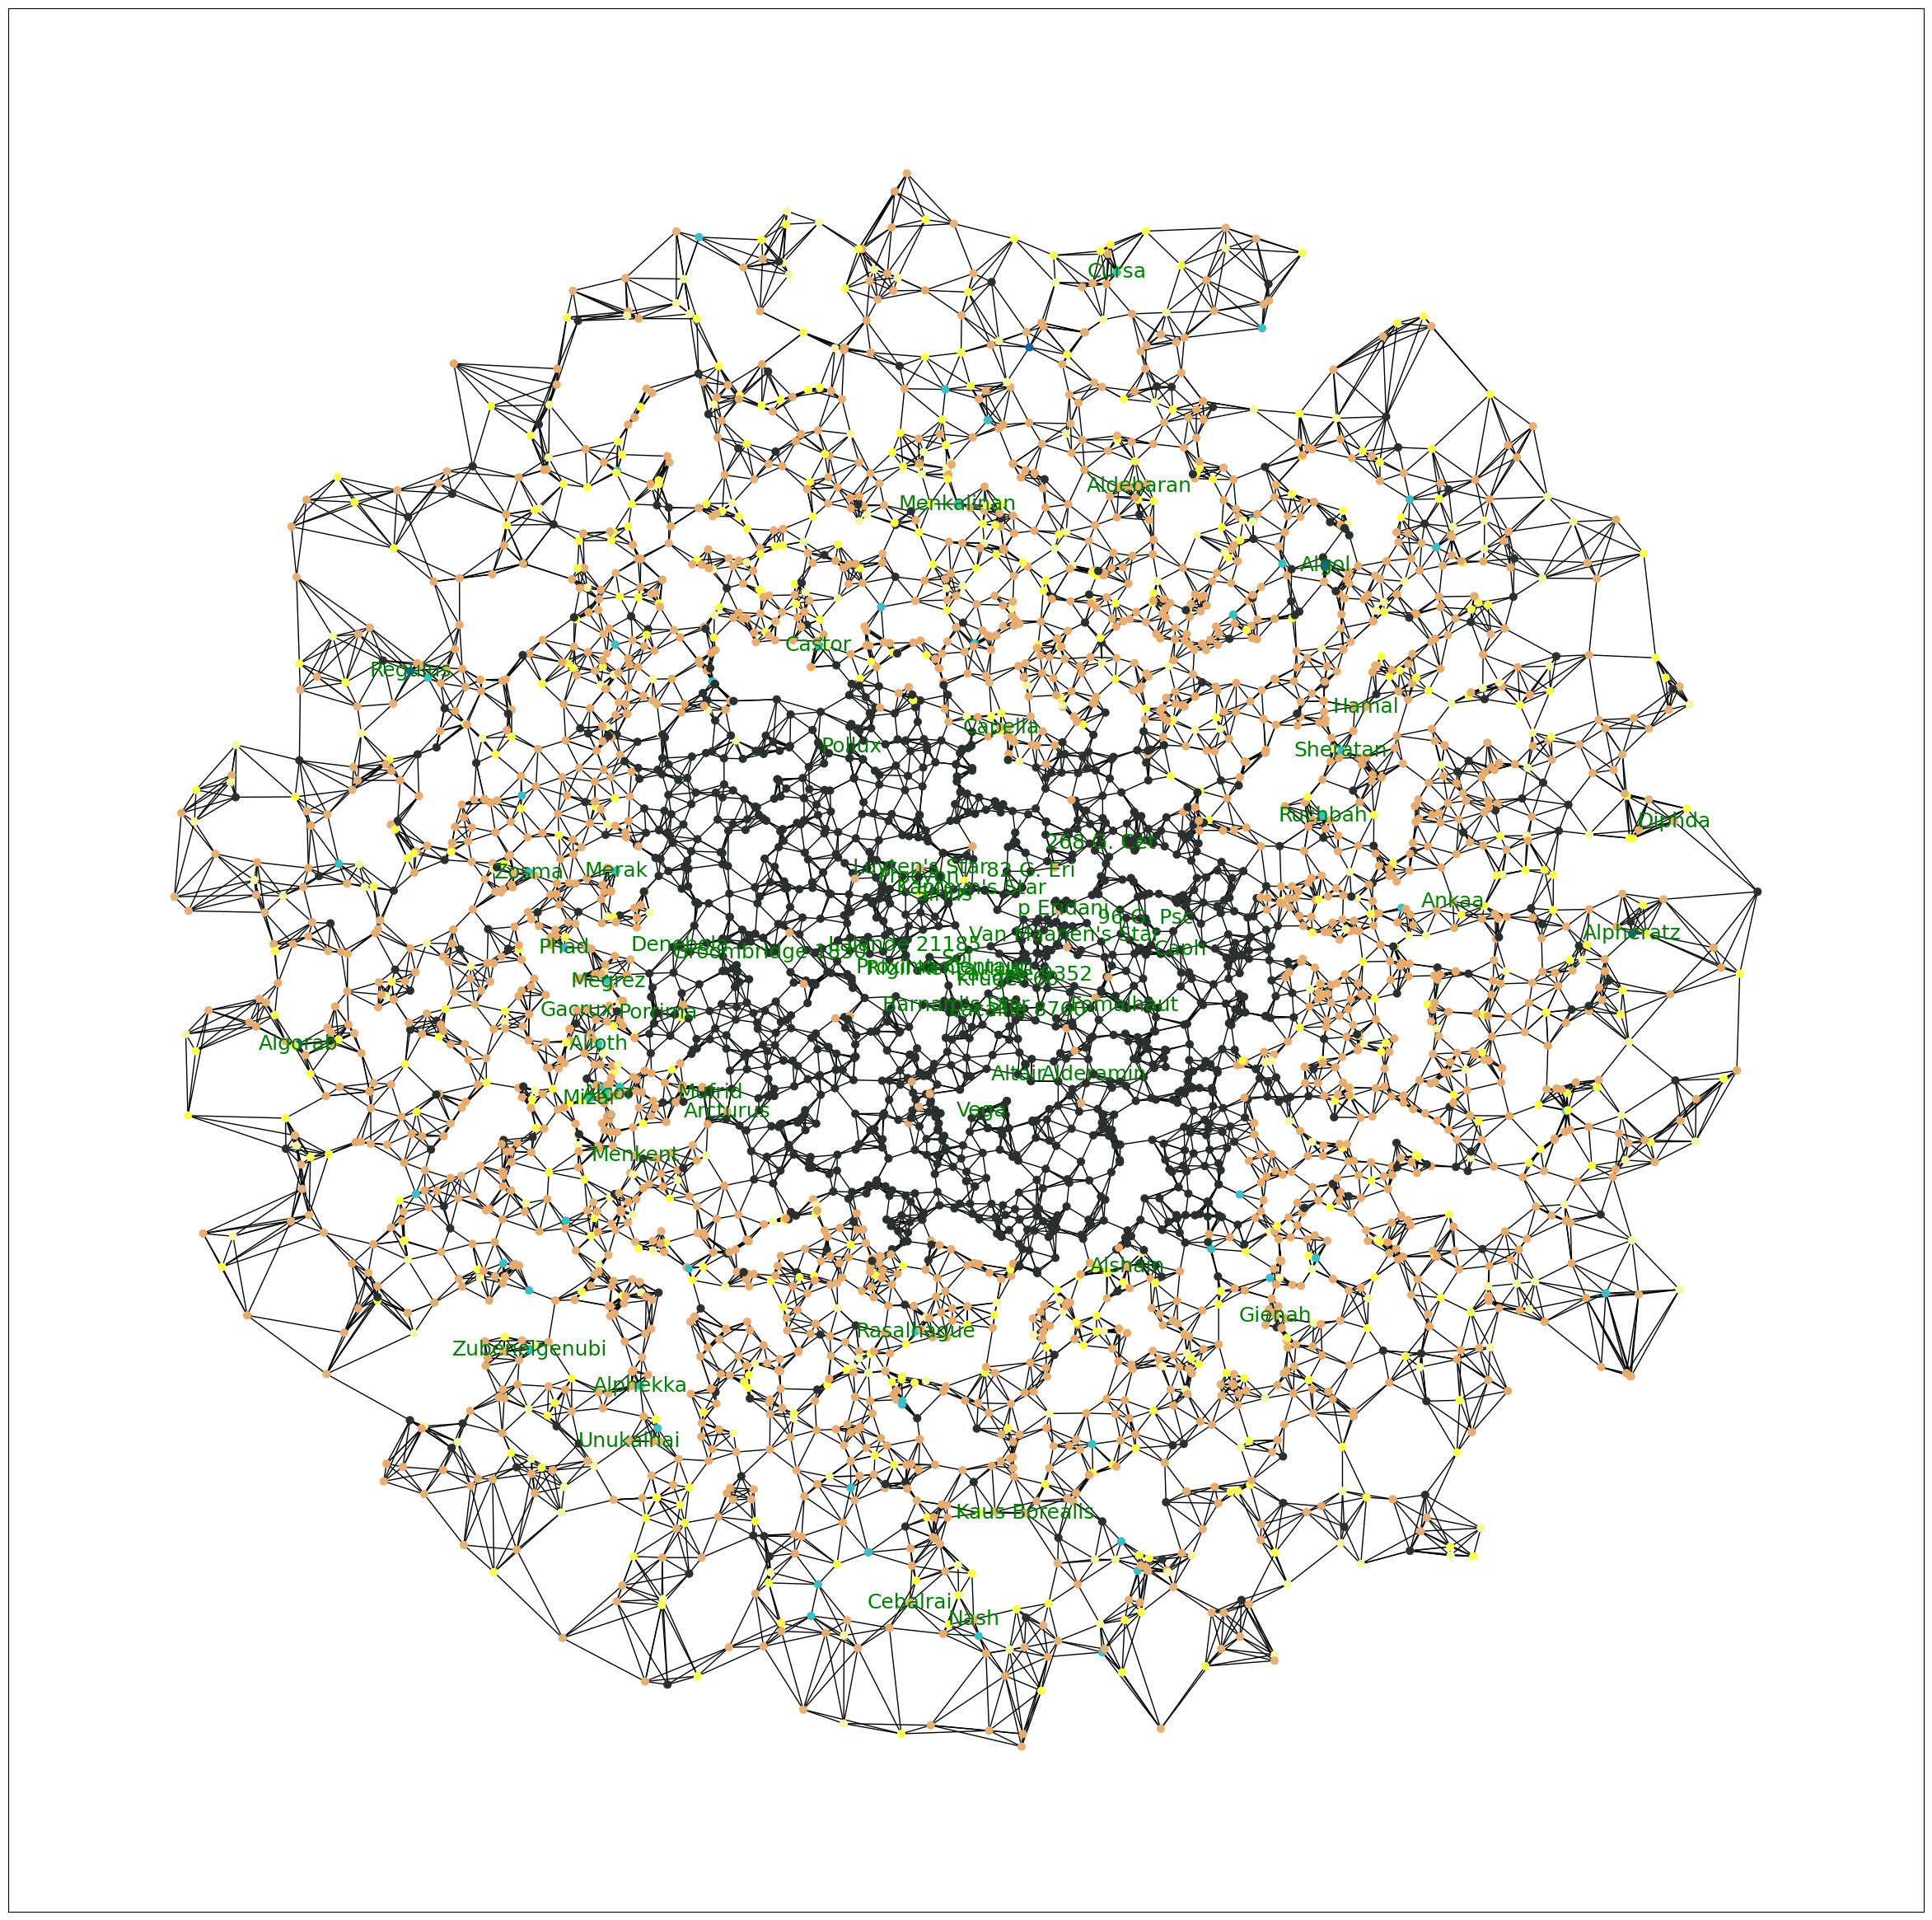

In [15]:
def colouring(Ghey,r):
    o=[]
    for i in range(4111):
        if Ghey[i]==0:
          if r[i]==None:
             o.append('#2a3030')
          elif ((r[i]).lower())=='m':
             o.append('#e8ab6d')
          elif ((r[i]).lower())=='k':
             o.append('#e6b077')
          elif ((r[i]).lower())=='g':
             o.append('#fcff4d')
          elif ((r[i]).lower())=='f':
             o.append('#f6f7a3')
          elif ((r[i]).lower())=='a':
             o.append('#3cbec7')
          elif ((r[i]).lower())=='b':
            o.append('#1660a6')
          else:
             o.append('#e8ab6d')
        else:
         o.append('#2a3030')
    return o

goom=colouring(Ghey,r)  
print(goom)
plt.figure(3,figsize=(30,30)) 
nx.draw_networkx(G,pos=d,node_color=goom,node_size=40,with_labels=False)
nx.draw_networkx_labels(G,d,labels=netwo,font_size=18,font_color='g')
plt.show()